In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data[data.duplicated()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [7]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoding_list = {}
# encoding_list is for list of encoding i.e
# {
#   'class': LabelEncoder(),
#   'cap-shape': LabelEncoder(),
#    and so on upto features
#                             }
mappers = {}

# mappers means, assign numbers to categories i.e
# {
#    'class': {'e': 0, 'p': 1}
#    'cap-shape': {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5
#                                                                 }

for i in data.columns:
    encoders = LabelEncoder()
    data[i] = encoders.fit_transform(data[i])
    encoding_list[i] = encoders
    mappers[i] = dict(zip(encoders.classes_, encoders.transform(encoders.classes_)))

In [10]:
for col, mapping in mappers.items():
    print(f"\nColumn: {col}")
    print(mapping)


Column: class
{'e': np.int64(0), 'p': np.int64(1)}

Column: cap-shape
{'b': np.int64(0), 'c': np.int64(1), 'f': np.int64(2), 'k': np.int64(3), 's': np.int64(4), 'x': np.int64(5)}

Column: cap-surface
{'f': np.int64(0), 'g': np.int64(1), 's': np.int64(2), 'y': np.int64(3)}

Column: cap-color
{'b': np.int64(0), 'c': np.int64(1), 'e': np.int64(2), 'g': np.int64(3), 'n': np.int64(4), 'p': np.int64(5), 'r': np.int64(6), 'u': np.int64(7), 'w': np.int64(8), 'y': np.int64(9)}

Column: bruises
{'f': np.int64(0), 't': np.int64(1)}

Column: odor
{'a': np.int64(0), 'c': np.int64(1), 'f': np.int64(2), 'l': np.int64(3), 'm': np.int64(4), 'n': np.int64(5), 'p': np.int64(6), 's': np.int64(7), 'y': np.int64(8)}

Column: gill-attachment
{'a': np.int64(0), 'f': np.int64(1)}

Column: gill-spacing
{'c': np.int64(0), 'w': np.int64(1)}

Column: gill-size
{'b': np.int64(0), 'n': np.int64(1)}

Column: gill-color
{'b': np.int64(0), 'e': np.int64(1), 'g': np.int64(2), 'h': np.int64(3), 'k': np.int64(4), 'n': np

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [12]:
data['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1])

# We can see the correlation between features visually using matplotlib and seaborn. Just for checking!

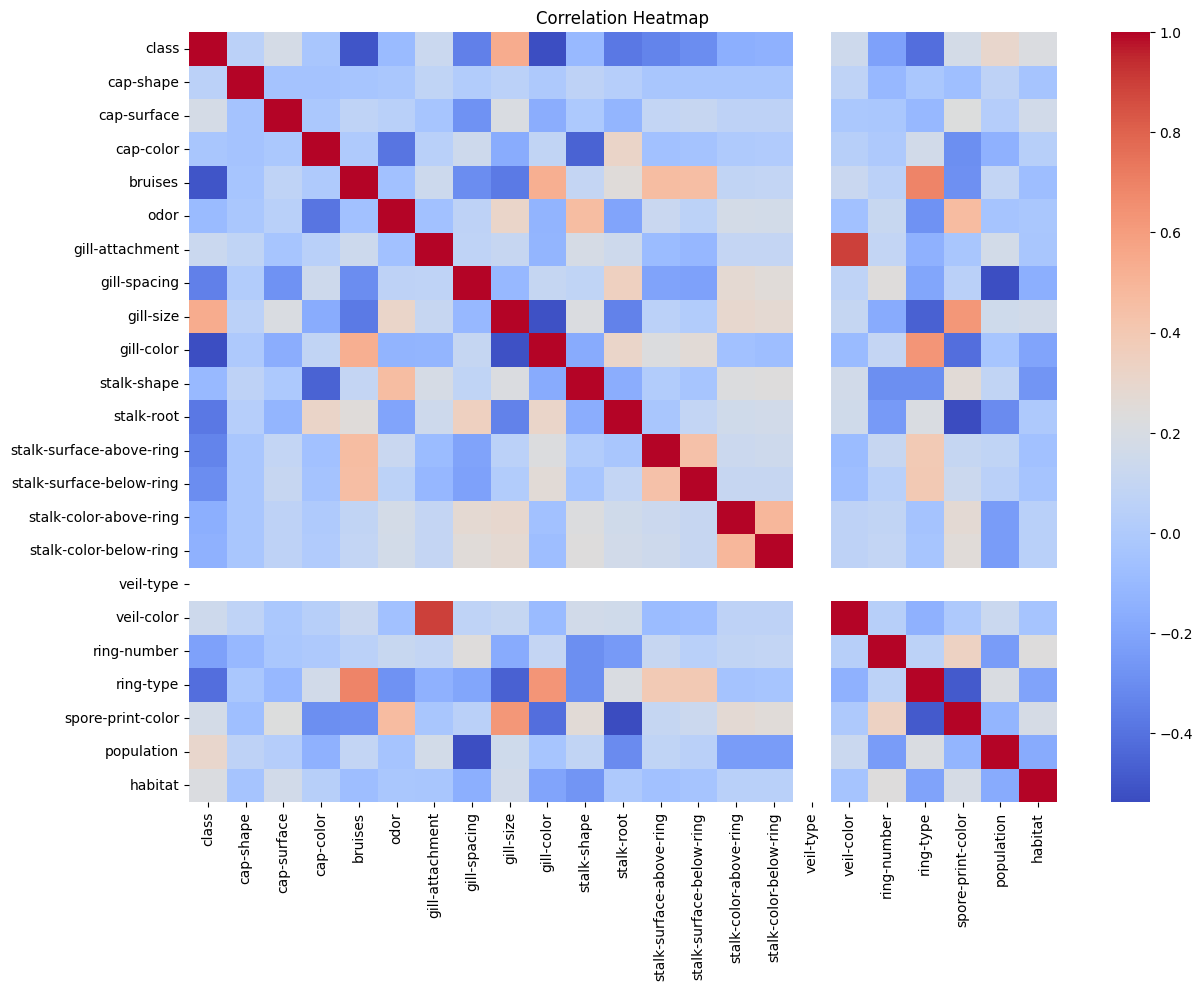

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Now, split data into train and test

In [18]:
X = data.drop(columns=['class'], axis=1)
y = data['class']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
X_train.shape, X_test.shape

((6499, 22), (1625, 22))

# Code Naive Bayes from Scratch

In [ ]:
# Fuckkkkk!!!!